# Predicción de diabetes con random forest

## 1. Importar bibliotecas y cargar datos

In [1]:
# Importar bibliotecas principales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Configuración de gráficos
sns.set(style="whitegrid")

# Cargar el dataset
filepath = "/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv"
diabetes_data = pd.read_csv(filepath)

# Inspeccionar los datos

print(diabetes_data.info())
print(diabetes_data.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## 2. Exploración de datos inicial

In [2]:
# Estadísticas descriptivas
print(diabetes_data.describe())

        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000  

In [3]:
# Verificar valores faltantes
print(diabetes_data.isnull().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


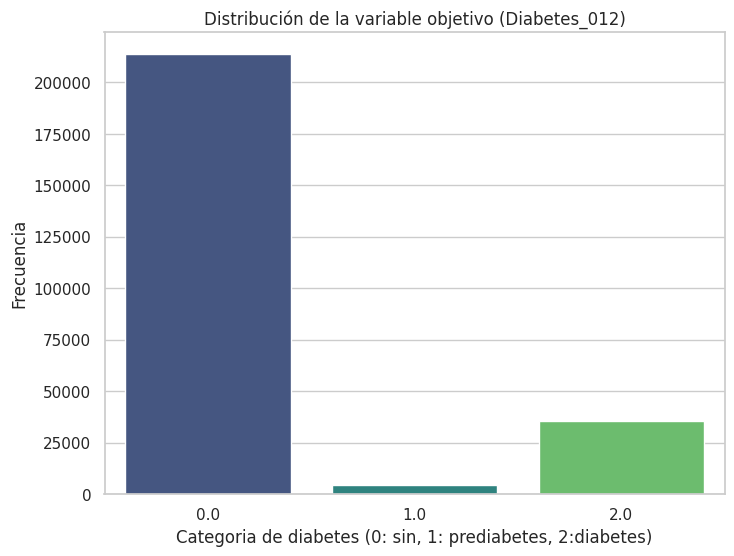

In [4]:
# Distribución de la variable objetivo
plt.figure(figsize=(8,6))
sns.countplot(x='Diabetes_012', data=diabetes_data, palette="viridis")
plt.title("Distribución de la variable objetivo (Diabetes_012)")
plt.xlabel('Categoria de diabetes (0: sin, 1: prediabetes, 2:diabetes)')
plt.ylabel('Frecuencia')
plt.show()

## 3. Análisis exploratorio de datos (EDA)

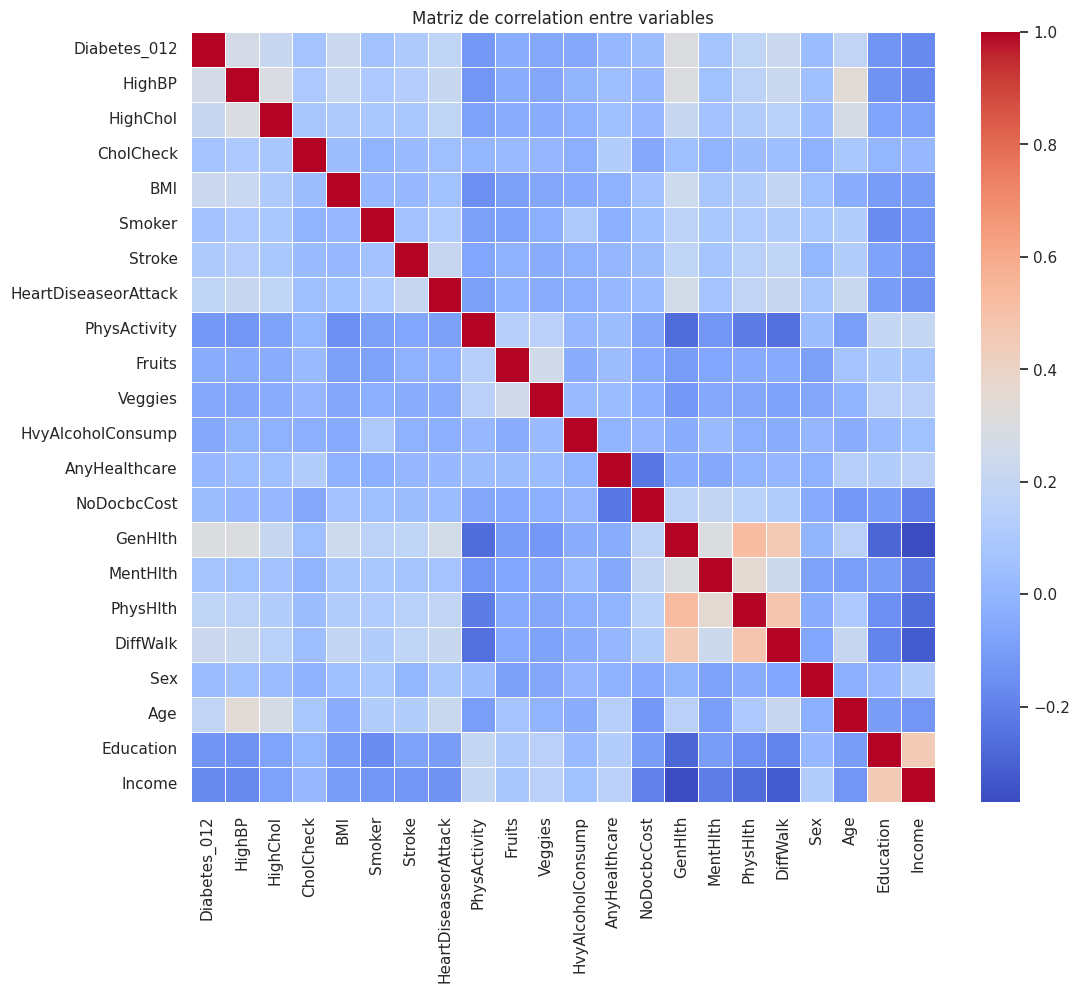

In [5]:
# Matriz de correlación

plt.figure(figsize=(12,10))
correlation_matrix = diabetes_data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlation entre variables')
plt.show()

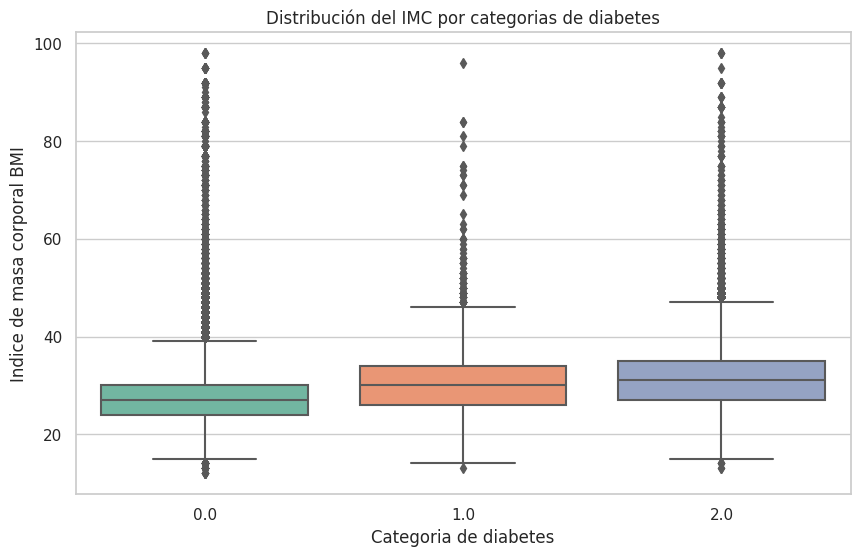

In [6]:
# Distribución del IMC por categorias de diabetes
plt.figure(figsize=(10,6))
sns.boxplot(x='Diabetes_012', y='BMI', data=diabetes_data, palette='Set2')
plt.title('Distribución del IMC por categorias de diabetes')
plt.xlabel('Categoria de diabetes')
plt.ylabel('Indice de masa corporal BMI')
plt.show()

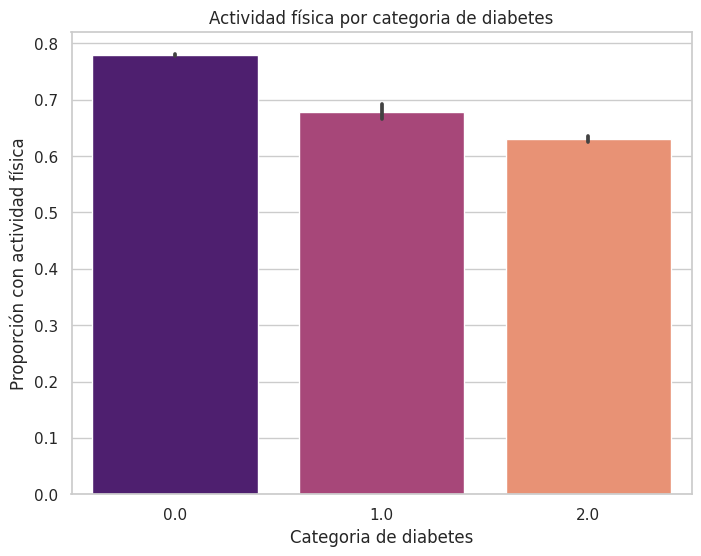

In [7]:
# Actividad física por categoria
plt.figure(figsize=(8,6))
sns.barplot(x='Diabetes_012', y='PhysActivity', data=diabetes_data, palette='magma')
plt.title('Actividad física por categoria de diabetes')
plt.xlabel('Categoria de diabetes')
plt.ylabel('Proporción con actividad física')
plt.show()

# 4. Preparación de datos

In [8]:
# Separar variables predictoras (X) y objetivo (y)
X = diabetes_data.drop('Diabetes_012', axis=1)
y = diabetes_data['Diabetes_012']

# Dividir el dataset en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar las dimensiones de los conjuntos
print(f"Entrenamiento: {X_train_scaled.shape}, Prueba: {X_test_scaled.shape}")


Entrenamiento: (202944, 21), Prueba: (50736, 21)


# 5. Entrenar y evaluar modelo Random Forest

In [9]:
# Entrenar el modelo
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
random_forest_model.fit(X_train_scaled, y_train)

# Predicción en el conjunto de prueba
y_pred = random_forest_model.predict(X_test_scaled)

# Evaluar el desempeño
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Mostrar resultados
print("Matriz de confusión:")
print(conf_matrix)
print("\nReporte de clasificación:")
print(classification_rep)
print(f"\nPrecisión Global: {accuracy:.2f}")

Matriz de confusión:
[[42275     0   466]
 [  878     0    48]
 [ 6327     0   742]]

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.59      0.10      0.18      7069

    accuracy                           0.85     50736
   macro avg       0.48      0.36      0.37     50736
weighted avg       0.80      0.85      0.80     50736


Precisión Global: 0.85


In [10]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Verificar distribución de clases balanceadas
print(y_train_balanced.value_counts())

# Reentrenar el modelo con datos balanceados
random_forest_balanced = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
random_forest_balanced.fit(X_train_balanced, y_train_balanced)

# Predicción en el conjunto de prueba
y_pred_balanced = random_forest_balanced.predict(X_test_scaled)

# Evaluar desempeño
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)
classification_rep_balanced = classification_report(y_test, y_pred_balanced)
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)

print("Matriz de Confusión (Balanceado):")
print(conf_matrix_balanced)
print("\nReporte de Clasificación (Balanceado):")
print(classification_rep_balanced)
print(f"\nPrecisión Global (Balanceado): {accuracy_balanced:.2f}")


Diabetes_012
0.0    170962
2.0    170962
1.0    170962
Name: count, dtype: int64
Matriz de Confusión (Balanceado):
[[34635   487  7619]
 [  470    25   431]
 [ 2524   136  4409]]

Reporte de Clasificación (Balanceado):
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86     42741
         1.0       0.04      0.03      0.03       926
         2.0       0.35      0.62      0.45      7069

    accuracy                           0.77     50736
   macro avg       0.44      0.49      0.45     50736
weighted avg       0.83      0.77      0.79     50736


Precisión Global (Balanceado): 0.77


## Conclusión del Modelo Balanceado

Después de aplicar balanceo con SMOTE, se obtuvieron los siguientes resultados:

### **1. Matriz de Confusión**
La matriz de confusión muestra que:
- El modelo predice bien para la clase `0.0` (sin diabetes).
- Tiene dificultades para distinguir las clases `1.0` (prediabetes) y `2.0` (diabetes).

| Clase Predicha \ Clase Real | **0.0 (Sin diabetes)** | **1.0 (Prediabetes)** | **2.0 (Diabetes)** |
|-----------------------------|------------------------|-----------------------|--------------------|
| **0.0 (Sin diabetes)**      | 34,635 (Correctas)    | 487 (Incorrectas)     | 7,619 (Incorrectas)|
| **1.0 (Prediabetes)**       | 470 (Incorrectas)     | 25 (Correctas)        | 431 (Incorrectas)  |
| **2.0 (Diabetes)**          | 2,524 (Incorrectas)   | 136 (Incorrectas)     | 4,409 (Correctas)  |

### **2. Métricas de Desempeño por Clase**
- **Clase `0.0` (sin diabetes)**: Buen desempeño con precisión del 92% y recall del 81%.
- **Clase `1.0` (prediabetes)**: Muy bajo desempeño, con precisión del 4% y recall del 3%.
- **Clase `2.0` (diabetes)**: Desempeño moderado, con precisión del 35% y recall del 62%.

| Clase | Precision | Recall | F1-Score | Soporte (Cantidad Real) |
|-------|-----------|--------|----------|--------------------------|
| **0.0** | 0.92      | 0.81   | 0.86     | 42,741                   |
| **1.0** | 0.04      | 0.03   | 0.03     | 926                      |
| **2.0** | 0.35      | 0.62   | 0.45     | 7,069                    |

### **3. Promedios de Métricas**
- **Macro avg**: Promedio de métricas por clase (sin ponderar):
  - Precisión: 44%, Recall: 49%, F1-Score: 45%.
- **Weighted avg**: Promedio ponderado por el tamaño de las clases:
  - Precisión: 83%, Recall: 77%, F1-Score: 79%.

### **4. Exactitud Global**
La **exactitud global** del modelo fue del 77%, indicando que acertó en el 77% de los casos.

### **Conclusión General**
- El modelo tiene un buen desempeño para la clase mayoritaria (`0.0`), pero no logra identificar correctamente las clases minoritarias (`1.0` y `2.0`).
- Para mejorar el modelo, se recomienda:
  - Ajustar los hiperparámetros, como `class_weight='balanced'`, para dar más peso a las clases minoritarias.
  - Experimentar con otros algoritmos como **XGBoost** o **Gradient Boosting**.
  - Realizar un análisis más profundo de las características relevantes para las clases `1.0` y `2.0`.

Con estas mejoras, se espera incrementar el desempeño para las clases minoritarias y equilibrar las métricas del modelo.
